In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
x_train,x_test = x_train/255.0,x_test/255.0
y_train,y_test = to_categorical(y_train,10),to_categorical(y_test,10)

In [4]:
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

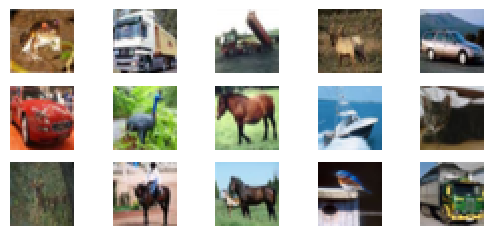

In [5]:
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


D:\games\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.3905 - loss: 1.6762 - val_accuracy: 0.5867 - val_loss: 1.1626
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6151 - loss: 1.0929 - val_accuracy: 0.6403 - val_loss: 1.0194
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6740 - loss: 0.9276 - val_accuracy: 0.6740 - val_loss: 0.9424
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7185 - loss: 0.8145 - val_accuracy: 0.6937 - val_loss: 0.9053
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7482 - loss: 0.7280 - val_accuracy: 0.6932 - val_loss: 0.9180
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7706 - loss: 0.6557 - val_accuracy: 0.6917 - val_loss: 0.9361
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7960 - loss: 0.5876 - val_accuracy: 0.6855 - val_loss: 0.9452
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8171 - loss: 0

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7003 - loss: 1.0161
Test loss: 1.040902018547058
Test accuracy: 0.6974999904632568
